In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
scaler=StandardScaler()
features=df.columns[1:]
df_scaled=pd.DataFrame(scaler.fit_transform(df[features]),columns=features)
df_scaled.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


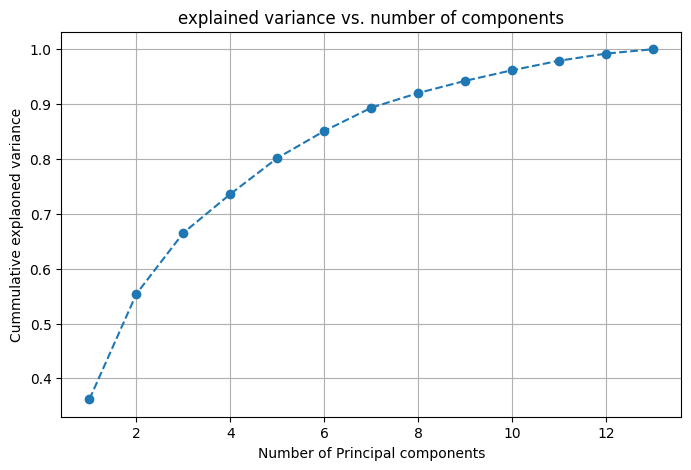

In [ ]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(df_scaled)
explained_variance=pca.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.plot(range(1,len(explained_variance)+1),np.cumsum(explained_variance),marker='o',linestyle='--')
plt.xlabel('Number of Principal components')
plt.ylabel('Cummulative explaoned variance')
plt.title('explained variance vs. number of components')
plt.grid()
plt.show()

In [ ]:
pca=PCA(n_components=6)
df_pca=pca.fit_transform(df_scaled)
df_pca=pd.DataFrame(df_pca,columns=[f"PC{i+1}"for i in range(6)])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520


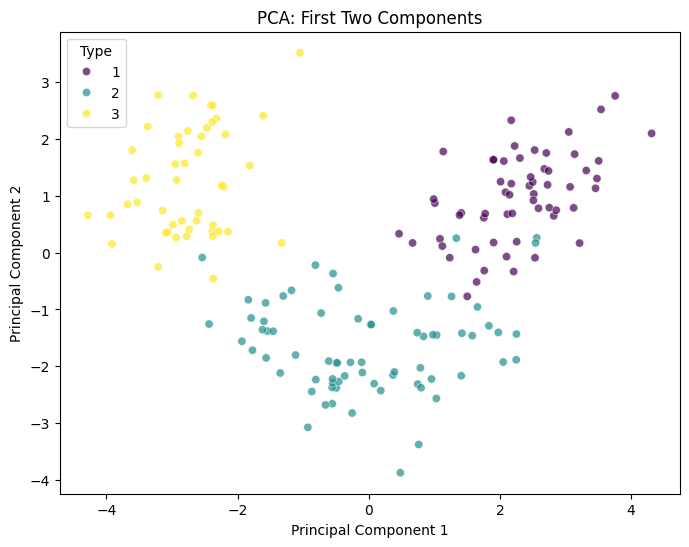

In [ ]:
import seaborn as sns

# Add 'Type' back for visualization
df_pca["Type"] = df["Type"]

# Scatter plot of first two PCs
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["Type"], palette="viridis", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: First Two Components")
plt.legend(title="Type")
plt.show()

In [ ]:
pca_components=pd.DataFrame(pca.components_, columns=df_scaled.columns,index=[f"PC{i+1}" for i in range(6)])
pca_components.T.abs().nlargest(5,'PC1')

,PC1,PC2,PC3,PC4,PC5,PC6
Flavanoids,0.422934,0.003360,0.150682,0.152295,0.109026,0.018920
Phenols,0.394661,0.065040,0.146179,0.198068,0.149318,0.084122
Dilution,0.376167,0.164496,0.166005,0.184121,0.101161,0.265851
Proanthocyanins,0.313429,0.039302,0.149454,0.399057,0.136860,0.533795
Nonflavanoids,0.298533,0.028779,0.170368,0.203301,0.500703,0.258594


In [ ]:
X_original=df.drop(columns=["Type"])

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
k=3
Kmeans=KMeans(n_clusters=k,random_state=42,n_init=10)
clusters=Kmeans.fit_predict(X_original)
df['Cluster']=clusters
sil_score=silhouette_score(X_original,clusters)
db_index=davies_bouldin_score(X_original,clusters)

print(f"Silhouette score: {sil_score:.3f}")
print(f"Davies-Bouldin Index:{db_index:.3f}")

Silhouette score: 0.571
Davies-Bouldin Index:0.534


In [ ]:
X_pca=pca.transform(X_original)

In [ ]:
from sklearn.cluster import KMeans

# Use the same number of clusters as before
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)

# Add cluster labels to the PCA dataframe
df_pca["Cluster"] = clusters_pca

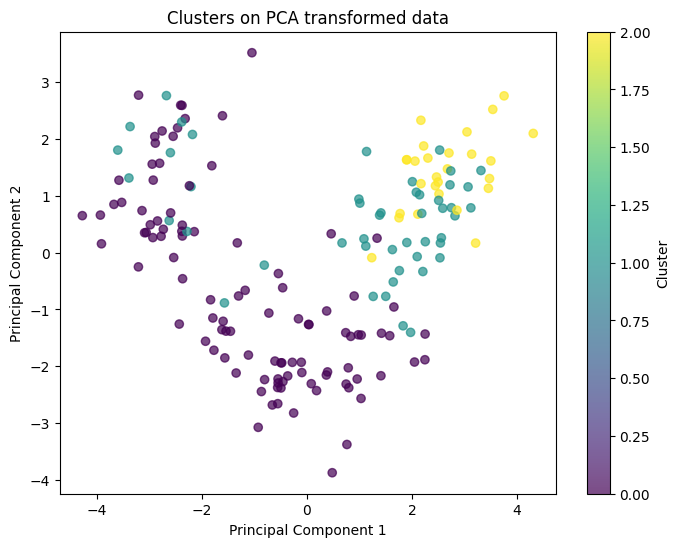

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df_pca.iloc[:,0],df_pca.iloc[:,1],c=clusters_pca, cmap='viridis',alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters on PCA transformed data')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
silhouette_pca=silhouette_score(X_pca,clusters_pca)
db_index_pca=davies_bouldin_score(X_pca,clusters_pca)
print(f"Silhouette Score (PCA): {silhouette_pca:.3f}")
print(f"Davies-Bouldin Index (PCA): {db_index_pca:.3f}")

Silhouette Score (PCA): 0.561
Davies-Bouldin Index (PCA): 0.555


1 Clustering Performance Comparison

original data:

silhouette score: 0.571

Davies-bouldin index: 0.534

PCA-transformed data:

silhouette score: 0.561

Davies-bouldin index: 0.555


Silhouette Score: Slightly better for original data, indicating better-defined clusters.

Davies-Bouldin Index: Lower for the original data, meaning clusters were more compact and well-separated.

Conclusion:
The original dataset gives marginally better clustering results than the PCA-transformed data. This suggests that while PCA helps in visualization and dimensionality reduction, it might slightly reduce the clustering quality due to information loss.



---
2 Visual Comparison
looking at the scatter plots
the pcaplot still shows well-separated clusters
the original data may retain some features pca ignored, improving clustering accuracy.


---

3 Impact of Dimensionality Reduction on Clustering Performance

Pros of PCA:

Reduces computational cost and improves visualization.

Helps in handling collinearity among features.

Can still maintain most of the dataset’s structure.

Cons of PCA:

May remove some useful variance, affecting cluster separation.

Requires careful selection of number of principal components.

---




**Trade-offs Between PCA and Clustering on the Original Dataset**  

1. **Computational Efficiency**: PCA reduces the number of dimensions, making clustering **faster and more efficient**. In contrast, clustering on the original dataset requires handling a **larger number of features**, which can be computationally **slower**.  

2. **Interpretability**: The principal components in PCA do not have direct physical meanings, making interpretation **harder**. On the other hand, clustering on the original dataset retains **feature meanings**, making it easier to understand and analyze.  

3. **Clustering Performance**: Clustering on PCA-transformed data may show **slightly lower performance** due to the loss of some variance. In contrast, clustering on the original dataset usually results in **better-defined clusters** with clearer separation.  

4. **Visualization**: PCA enables **easy visualization** in 2D or 3D by reducing dimensions, which is beneficial for understanding cluster structures. However, clustering on the original dataset becomes **challenging to visualize** if there are more than three features.  

5. **Handling of Redundant Features**: PCA is effective in **removing correlations** between features, which helps in improving clustering stability. Clustering on the original dataset, however, may be affected by **feature redundancy**, potentially impacting the clustering structure.

Conclusion and Insights
1. Key Findings and Insights
PCA helps reduce dimensionality but may slightly reduce clustering performance.
The original dataset provides better-defined clusters, but PCA still maintains reasonable separation.
Choosing the right number of principal components is important for balancing accuracy and efficiency.
2. Practical Implications of PCA and Clustering
PCA is useful when:

The dataset has many correlated features.
Computational efficiency is a concern.
Visualization is needed in 2D or 3D.
Clustering on the original dataset is preferred when:

Feature interpretability is important.
There are distinct, well-separated clusters.
More accuracy is needed.
3. Recommendations for Using PCA and Clustering

Use PCA + Clustering when working with high-dimensional datasets for efficiency and visualization.

Use Clustering on Original Data if performance is more important and you have the computational power.

